<a href="https://colab.research.google.com/github/JANGJINHEE98/AIB_First_project/blob/main/AIB_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# 깨달은점 for문과 if문의 사용법, cnt를 넣어주지 않으면 바뀌지 않음 
# 데이터를 처리하려고 할때 데이터를 합쳤다가 다시 갈라서 처리하려고 했으나, 그것은 데이터셋을 망치는 지름길? 이라고 한다. 
# 결측치를 처리하는 여러가지 방법 중에 평균을 넣는 방법을 실제로 사용해보았다!

#전처리😉

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [59]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)
# df.drop_duplicates(inplace = True) 중복을 지울려고 했지만, shape가 딱히 차이가 없어 지우지 않음.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [61]:
df.shape

(16598, 9)

In [62]:
#결측치 확인 
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [63]:
df[df['Year'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [64]:
df[df['Genre'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [65]:
df[df['Publisher'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [66]:
#K와 M제거 후 숫자 맞춰 주기!

def replaceK (myseries) :
  cnt = 0
  for i in myseries : 
    if 'K' in i :
      i = i.replace('K', '')
      i = float(i)
      i /= 1000
      myseries[cnt] = i
    cnt += 1
  return myseries 

def replaceM (myseries) :
  cnt = 0
  for i in myseries :
    if 'M' in i :
      i = i.replace('M', '')
      myseries[cnt] = i
    cnt += 1
  return myseries

sales = ['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']

for i in sales : 
  replaceM(df[i])
  replaceK(df[i]) 
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [67]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [68]:
# object타입 바꿔주기 

from pandas.api.types import is_numeric_dtype #numeric인지 아닌지 알려주는 함수 맞을 경우 True를 반환

def toNumeric(string):
  if is_numeric_dtype(string) == False :
    return pd.to_numeric(string)

for i in sales :
  df[i] = df[i].apply(toNumeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [69]:
#출고량이 높은 게임을 먼저 골라낸다. 출고량이 높은 게임만 골라서 결측치를 채울 예정임! 
 
df['Sales_sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] +	df['Other_Sales']


df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [70]:
df_sorted_by_values = df.sort_values(by='Sales_sum' ,ascending=False,ignore_index=True)
df_sorted_by_values.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


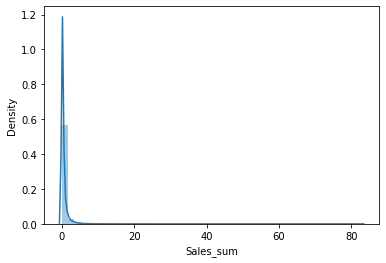

In [71]:
#출고량이 높은 기준을 정해보자. Sales_sum으로 히스토그램 그리기 
sns.distplot(df_sorted_by_values.Sales_sum)

In [72]:
#10M까지 출고량이 높은 것으로 치부합니다. 근데 게임으로 성공하기 진짜 어렵나보다......

In [73]:
df_best = df_sorted_by_values[df_sorted_by_values['Sales_sum'] > 10]
df_best.shape #인덱스 62까지만 결측치 채우기

(62, 10)

In [74]:
df_best = df_best.iloc[:63]

In [75]:
df_best.isnull().sum() #결과 : (장르) 1개 분야에서 결측치 하나만 찾아서 채워보자.

Name           0
Platform       0
Year           0
Genre          1
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Sales_sum      0
dtype: int64

In [76]:
df_best.loc[df_best['Genre'].isnull() == True] #검색 결과 장르는 Role-Playing

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
32,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35


In [77]:
df.loc[df['Name'] == 'Pokemon X/Pokemon Y'].fillna('Role-Playing', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [78]:
df.dropna(subset=['Genre'], inplace = True)

In [79]:
df.shape #판매량이 높은 게임의 장르는 채워넣고, 나머지는 드롭함

(16548, 10)

In [80]:
#publisher가 unknown 데이터
# df[df['Publisher']=='Unknown'].head()
df['Publisher'].fillna('Unknown', inplace = True)

In [81]:
df.isnull().sum() # Genre&Publisher 데이터는 다 처리함

Name             0
Platform         0
Year           271
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Sales_sum        0
dtype: int64

In [82]:
df.Year.max(), df.Year.min() #큰 값은 정상적으로 나오지만, 작은 값 중에 0이 있다. 

(2020.0, 0.0)

In [83]:
df.loc[df.Year < 100, 'Year'] #잘못된 데이터 확인

74        9.0
81       97.0
213      11.0
304      15.0
768       3.0
         ... 
15985    94.0
16103     8.0
16149     8.0
16394     0.0
16482    98.0
Name: Year, Length: 100, dtype: float64

In [84]:
cnt = 0
for i in df['Year']:
  if 50 < i < 100 :
    df['Year'].iloc[cnt] = i+1900
  elif i <= 21 :
    df['Year'].iloc[cnt] = i+2000
  cnt += 1 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [85]:
df.loc[df.Year != 0, 'Year'].mean() #평균(2006)으로 결측치를 대체한다.

2006.4076303987222

In [86]:
df.fillna(2006, inplace = True) #결측치는 평균으로 대체

In [87]:
df.Year = df.Year.astype(int) #int형으로 바꿔줌

In [88]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


#데이터 분석 🥺
지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

##1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [89]:
df2 = df[['Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
df2.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04


In [90]:
# NA EU JP Other 에서 즐기는 게임중 가장 많이 팔린 순서대로 줄을 세운다. 

In [91]:
df2.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16548.000000,16548.000000,16548.000000,16548.000000
mean,0.264222,0.146302,0.077238,0.047873
std,0.816664,0.504386,0.306700,0.188183
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [92]:
grouped = df2.groupby(df2['Genre']).sum()
grouped

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


In [93]:
# 각 지열별로 상위, 하위 5개 

In [94]:
sorted_NA = grouped[['NA_Sales']].sort_values(by = 'NA_Sales', ascending=False)
display(sorted_NA.iloc[:5], sorted_NA.iloc[-5:])

,NA_Sales
Genre,
Action,874.81
Sports,680.52
Shooter,581.92
Platform,446.44
Misc,408.05


,NA_Sales
Genre,
Fighting,223.20
Simulation,182.96
Puzzle,123.35
Adventure,105.66
Strategy,68.70


In [95]:
sorted_EU = grouped[['EU_Sales']].sort_values(by = 'EU_Sales', ascending=False)
display(sorted_EU.iloc[:5], sorted_EU.iloc[-5:])

,EU_Sales
Genre,
Action,522.16
Sports,376.48
Shooter,313.05
Racing,237.10
Misc,212.36


,EU_Sales
Genre,
Simulation,113.35
Fighting,101.22
Adventure,64.05
Puzzle,50.73
Strategy,45.32


In [96]:
sorted_JP = grouped[['JP_Sales']].sort_values(by = 'JP_Sales', ascending=False)
display(sorted_JP.iloc[:5], sorted_JP.iloc[-5:])

,JP_Sales
Genre,
Role-Playing,344.95
Action,157.90
Sports,135.37
Platform,130.65
Misc,105.27


,JP_Sales
Genre,
Puzzle,56.87
Racing,56.40
Adventure,51.95
Strategy,49.46
Shooter,38.28


In [97]:
sorted_Other = grouped[['Other_Sales']].sort_values(by = 'Other_Sales', ascending=False)
display(sorted_Other.iloc[:5], sorted_Other.iloc[-5:])

,Other_Sales
Genre,
Action,186.45
Sports,134.67
Shooter,102.65
Racing,77.10
Misc,74.04


,Other_Sales
Genre,
Fighting,36.64
Simulation,31.48
Adventure,16.81
Puzzle,12.52
Strategy,11.36


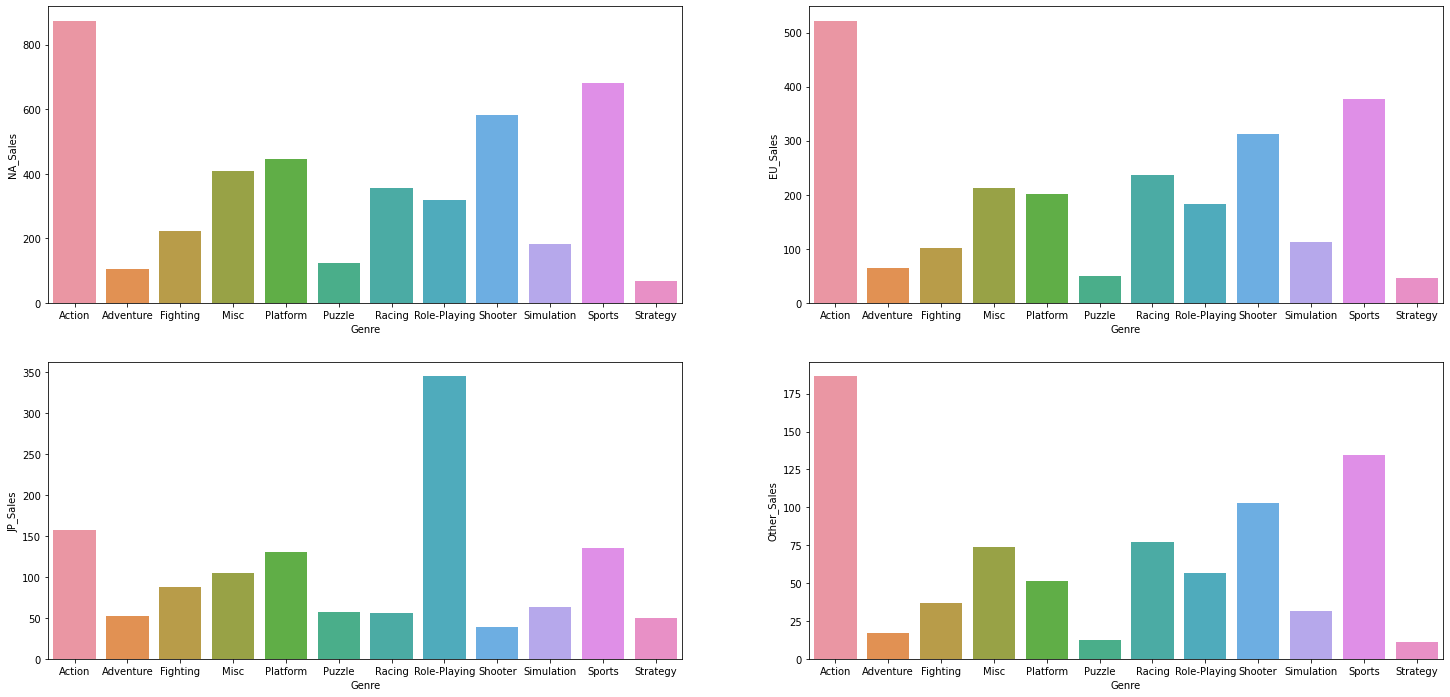

In [98]:
#barplot으로 나타내기 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,12))
sns.barplot(x=grouped.index, y='NA_Sales', data=grouped, ax = ax1)
sns.barplot(x=grouped.index, y='EU_Sales', data=grouped, ax = ax2)
sns.barplot(x=grouped.index, y='JP_Sales', data=grouped, ax = ax3)
sns.barplot(x=grouped.index, y='Other_Sales', data=grouped, ax = ax4)

#2. 연도별 게임의 트렌드가 있을까?

In [99]:
#연도별로 가장 인기 있었던 장르 고르기 
df3 = df[['Year', 'Genre']]

In [100]:
df3 = df3.groupby(['Year', 'Genre']).size()
df3

Year  Genre       
1980  Action           1
      Fighting         1
      Misc             4
      Shooter          2
1981  Action          25
                      ..
2016  Sports          38
      Strategy        10
2017  Action           1
      Role-Playing     2
2020  Simulation       1
Length: 388, dtype: int64

In [101]:
df3 = pd.DataFrame(df3)
df3

0
Year Genre           
1980 Action         1
     Fighting       1
     Misc           4
     Shooter        2
1981 Action        25
...                ..
2016 Sports        38
     Strategy      10
2017 Action         1
     Role-Playing   2
2020 Simulation     1

[388 rows x 1 columns]

In [102]:
df3.describe()

,0
count,388.000000
mean,42.649485
std,52.818159
min,1.000000
25%,5.000000
50%,23.000000
75%,57.500000
max,271.000000


In [103]:
df3.reset_index(inplace = True)
df3.columns = ["Year", "Genre", "Game_total"] #장르별로 게임이 몇개나 출시되었는지
df3

,Year,Genre,Game_total
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [104]:
idx = df3.groupby(['Year'])['Game_total'].transform(max) == df3['Game_total'] #출시된 게임장르중에 가장 많이 출시된것 하나만 
df3 = df3[idx]
df3.head(10)

,Year,Genre,Game_total
2,1980,Misc,4
4,1981,Action,25
11,1982,Action,18
18,1983,Action,7
28,1984,Puzzle,3
29,1984,Racing,3
30,1984,Shooter,3
34,1985,Platform,4
35,1985,Puzzle,4
39,1986,Action,6


In [105]:
df3 = df3.drop_duplicates(['Year'])

In [106]:
df3.reset_index(drop = True, inplace= True)

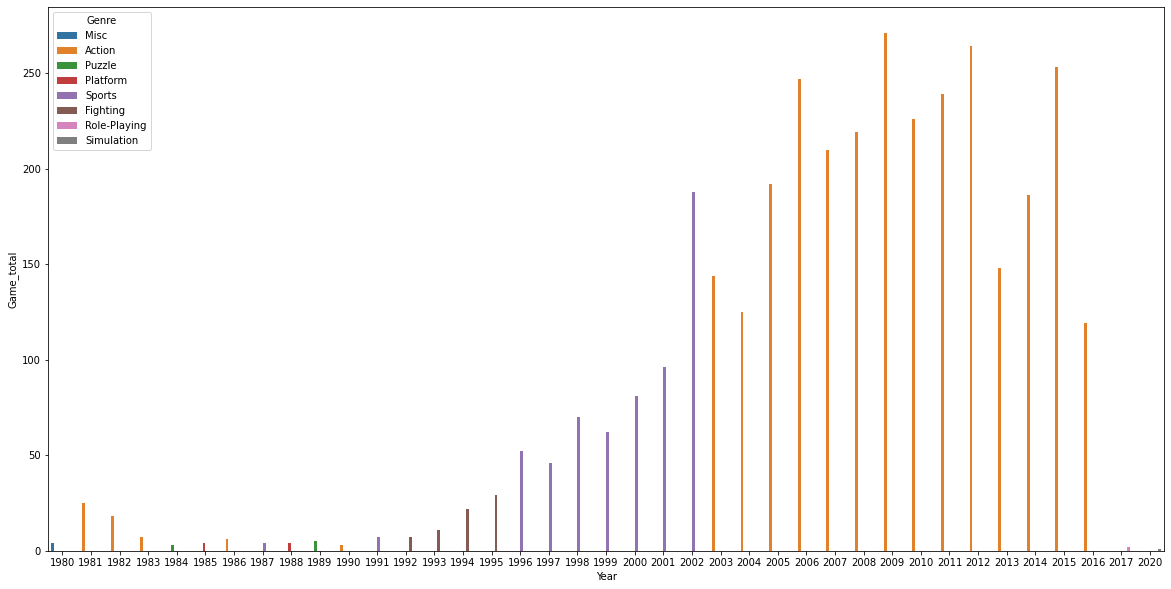

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Game_total', data=df3, hue='Genre')

In [108]:
# 2010년도 부터 가장 인기 있는 플랫폼
df4 = df[['Year','Platform', 'Sales_sum']] 
df4 = df4[df4['Year'] > 2010] 
df4 = df4.groupby(['Year', 'Platform']).sum() #연도별 / 플랫폼 별로 팔린 게임의 합
df4.reset_index(inplace=True)
df4 = df4[df4['Sales_sum']>30] #총 팔린 갯수가 30M 보다 높은 것들만 추출

In [109]:
df4.reset_index(inplace=True)
df4

,index,Year,Platform,Sales_sum
0,0,2011,3DS,62.58
1,2,2011,PC,35.19
2,4,2011,PS3,159.37
3,7,2011,Wii,62.02
4,8,2011,X360,144.54
5,9,2012,3DS,51.10
6,12,2012,PS3,108.32
7,17,2012,X360,100.82
8,18,2013,3DS,41.51
9,21,2013,PS3,117.42


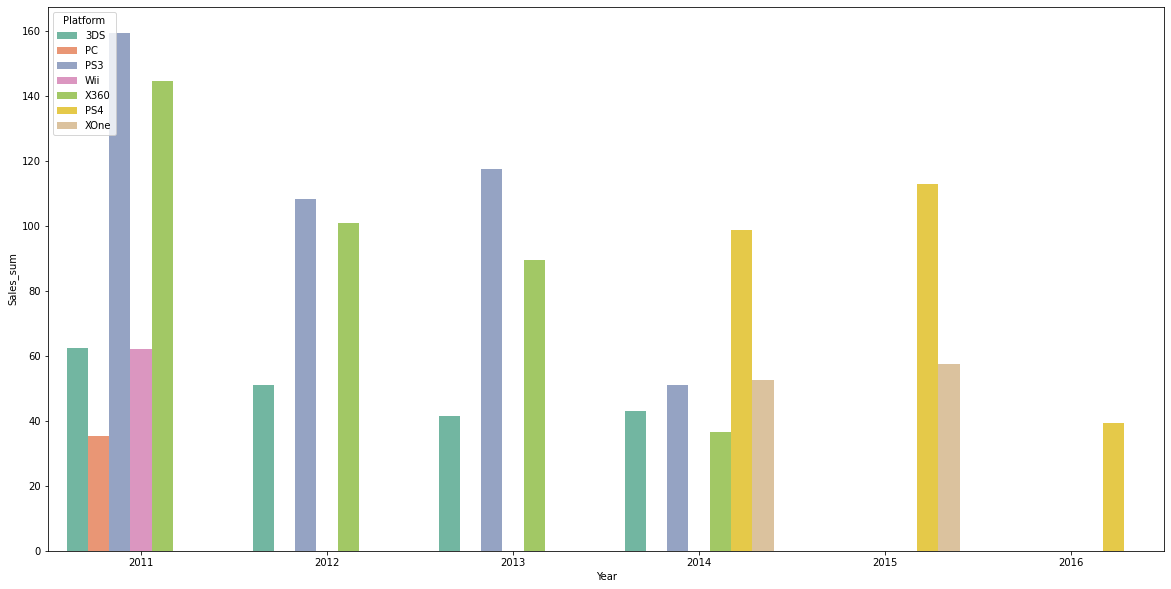

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(data=df4, x='Year', y='Sales_sum', hue='Platform', palette=("Set2"))